In [1]:
import json

file_path = './1.Training/라벨링데이터/자동차/자동차_295107.json'

#json파일 불러오기
with open(file_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

parsed_data =[] # 파싱 데이터를 저장할 변수

for docu in data['documents']:
    # 문서 내 id, Q_refined 추출
    doc_id = docu['id']
    q_refiled = docu['Q_refined']

    # endity는 여러개 존재하니 [개채명 : 개체 분류] 형식으로 파싱
    entities = [[eneity['form'], eneity['label']] 
                for eneity in docu["labeling"]["entities"]]

    # 현재 document의 정보를 딕셔너리에 담고, 리스트에 추가
    raw_dict = {
        "문서ID": doc_id,
        "컨텐츠": q_refiled,
        "개체": entities
    }
    parsed_data.append(raw_dict)

In [2]:
import pandas as pd

# 파싱이 완료된 데이터를 Dataframe 형식으로 변환
raw_data = pd.DataFrame(parsed_data)

display(raw_data)

,문서ID,컨텐츠,개체
0,B11-2,마산 #@주소# 불법주정차에 대한 조치 요청드립니다.,"[[마산, LOC]]"
1,B11-3,불법주정차 처리 부탁드립니다. 위치는 마산 #@주소#입니다.,"[[마산, LOC]]"
2,B11-4,마산 #@주소# 불법주정차 행위 조치 부탁합니다.,"[[마산, LOC]]"
3,B20-0,삼각지 주차로 인한 보행자 안전 위협 조치해주세요.,"[[주차, AFW]]"
4,B20-1,삼각지 주차로 인해 보행자 안전이 위험합니다. 개선 부탁드립니다.,"[[주차, AFW]]"
...,...,...,...
295102,C49972-3,창원에서 법인차량 주소지를 변경신고하고자 담당부서 안내 요청드립니다.,"[[창원, LOC], [법인차량, AFW]]"
295103,C49972-4,창원에 있는 법인차량의 주소지 변경하고 신고하려고 하는데 담당부서를 안내 부탁드립니다.,"[[창원, LOC], [법인차량, AFW]]"
295104,C49996-2,창원시 주정차 과태료 관련 문의합니다.,"[[창원시, LOC]]"
295105,C49996-3,창원시 주정차 과태료 관련 문의드려요.,"[[창원시, LOC]]"


In [3]:
# 데이터 및 텍스트 전처리 함수를 모듈화 시킨 파일
from NLP_pp import *
# 데이터셋읜 결측치 & 중복치 제거 함수 실행
raw_data = df_cleaning(raw_data, '컨텐츠')

In [4]:
display(raw_data)

,문서ID,컨텐츠,개체
0,B11-2,마산 #@주소# 불법주정차에 대한 조치 요청드립니다.,"[[마산, LOC]]"
1,B11-3,불법주정차 처리 부탁드립니다. 위치는 마산 #@주소#입니다.,"[[마산, LOC]]"
2,B11-4,마산 #@주소# 불법주정차 행위 조치 부탁합니다.,"[[마산, LOC]]"
3,B20-0,삼각지 주차로 인한 보행자 안전 위협 조치해주세요.,"[[주차, AFW]]"
4,B20-1,삼각지 주차로 인해 보행자 안전이 위험합니다. 개선 부탁드립니다.,"[[주차, AFW]]"
...,...,...,...
185300,C49972-2,창원 법인차량 주소지를 변경신고하려는데 필요한 구비서류가 어떻게 되는지 담당부서와 ...,"[[창원, LOC], [법인차량, AFW]]"
185301,C49972-3,창원에서 법인차량 주소지를 변경신고하고자 담당부서 안내 요청드립니다.,"[[창원, LOC], [법인차량, AFW]]"
185302,C49972-4,창원에 있는 법인차량의 주소지 변경하고 신고하려고 하는데 담당부서를 안내 부탁드립니다.,"[[창원, LOC], [법인차량, AFW]]"
185303,C49996-2,창원시 주정차 과태료 관련 문의합니다.,"[[창원시, LOC]]"


In [5]:
import re

# 한글, 영어(소문자, 대문자), 숫자
p1 = re.compile(r'[^가-힣a-zA-Z0-9\s]')
# 개행문자 + 하나 이상의 공백문자
p2 = re.compile(r'\n|\s+')
# 영어 대문자만 있는 경우를 감지하는 정규표현식 패턴
p999 = re.compile(r'^[A-Z]+$')

def regex_sub(origin_sent):
    clean_text = p1.sub(repl=" ", string=origin_sent)
    clean_text = p2.sub(" ", clean_text)

    return clean_text

# [개체:태그]데이터는 리스트 형식이라서 위 함수를 콜백으로 사용함
def list_regex_sub(origin_list):
    return [[regex_sub(entity), label] for entity, label in origin_list]

# 태그 항목을 클리닝하는 함수
def clean_tags(entity_list):
    # 각 [개체명, 태그] 쌍을 검사하여 태그가 영어 대문자 외 단어가 포함된 경우
    # 이 태그는 오염된 태그이니 [개체명, 오염된 태그] 리스트 자체를 제거
    cleaned_list = [[entity, tag] for entity, tag in entity_list if p999.match(tag)]
    
    return cleaned_list

In [6]:
# 설계한 정규표현식기반 특수문자 삭제 함수 적용
# apply함수는 inplace=True(덮어쓰기) 기능이 없음
raw_data['컨텐츠'] = raw_data['컨텐츠'].apply(regex_sub)
raw_data['개체'] = raw_data['개체'].apply(list_regex_sub)

# 태그 항목에서 오염된 태그 항목을 제거하는 함수 구동
raw_data['개체'] = raw_data['개체'].apply(clean_tags)

In [7]:
display(raw_data)

,문서ID,컨텐츠,개체
0,B11-2,마산 주소 불법주정차에 대한 조치 요청드립니다,"[[마산, LOC]]"
1,B11-3,불법주정차 처리 부탁드립니다 위치는 마산 주소 입니다,"[[마산, LOC]]"
2,B11-4,마산 주소 불법주정차 행위 조치 부탁합니다,"[[마산, LOC]]"
3,B20-0,삼각지 주차로 인한 보행자 안전 위협 조치해주세요,"[[주차, AFW]]"
4,B20-1,삼각지 주차로 인해 보행자 안전이 위험합니다 개선 부탁드립니다,"[[주차, AFW]]"
...,...,...,...
185300,C49972-2,창원 법인차량 주소지를 변경신고하려는데 필요한 구비서류가 어떻게 되는지 담당부서와 ...,"[[창원, LOC], [법인차량, AFW]]"
185301,C49972-3,창원에서 법인차량 주소지를 변경신고하고자 담당부서 안내 요청드립니다,"[[창원, LOC], [법인차량, AFW]]"
185302,C49972-4,창원에 있는 법인차량의 주소지 변경하고 신고하려고 하는데 담당부서를 안내 부탁드립니다,"[[창원, LOC], [법인차량, AFW]]"
185303,C49996-2,창원시 주정차 과태료 관련 문의합니다,"[[창원시, LOC]]"


In [8]:
# 데이터프레임의 항목을 분리 후 리스트 타입으로 변경
raw_x_data = raw_data['컨텐츠'].values.tolist()
# 개체 : 개체 라벨링 의 태그 정보는 따로 추출한다.
tag_data = raw_data['개체'].values.tolist()

In [9]:
from mecab import MeCab #한글 단어 토크나이저
from tqdm import tqdm

#mecab 형태소 분석기 인스턴스화
word_tokenizer = MeCab()

In [10]:
# 토큰화 수행
tokenized_x_data = tokenize(raw_x_data, word_tokenizer)

토큰화 진행 중: 100%|██████████| 185305/185305 [00:24<00:00, 7639.36it/s]


In [11]:
# BIO 태깅 방법론으로 태깅처리된 y데이터와 태깅 검증을 위한 데이터(token_tag) 두개 반환
tagged_y_label, token_tag_data = BIO_tagging(tokenized_x_data, 
                                             tag_data, 
                                             word_tokenizer)

BIO 태깅 진행 중: 100%|██████████| 185305/185305 [00:12<00:00, 15407.81it/s]


In [12]:
import random

# 코드 검증을 임의로 반복하기 위해 랜덤으로 샘플링
sample_idx = random.randint(0, len(tokenized_x_data)-1)
val_BIO_tagging(raw_x_data, tokenized_x_data,
                tag_data, token_tag_data,
                tagged_y_label, sample_idx)

원문 데이터 raw_x : 성산구 버스정류소에 불법주정차된 차량을 신고합니다 
토큰화 데이터(x)  : ['성산구', '버스', '정류소', '에', '불법', '주정차', '된', '차량', '을', '신고', '합니다']
태그 데이터(tag)  : [['성산구', 'LOC'], ['버스', 'AFW'], ['차량', 'AFW']]
토큰 태그데이터   : [['성산구'], 'B-LOC', ['버스'], 'B-AFW', ['차량'], 'B-AFW']
라벨링 데이터(y)  : ['B-LOC', 'B-AFW', 'O', 'O', 'O', 'O', 'O', 'B-AFW', 'O', 'O', 'O']


In [13]:
from sklearn.model_selection import train_test_split

# 훈련/검증/평가를 80%, 15%, 5%로 분할을 수행
# random_state -> 데이터셋을 내누는데 '재현성' 유지를 위해 넣음 -> 안넣어도 됨
# stratify -> y 클래스 비율을 알기 어렵기에 해당 항목은 없앰
x_train, x_etc, y_train, y_etc = train_test_split(
    tokenized_x_data, tagged_y_label, test_size=0.20
)

# 그 외 데이터셋을 반반으로 Val, Test로 나눔
x_val, x_test, y_val, y_test = train_test_split(
    x_etc, y_etc, test_size=0.25
)

In [14]:
val_class_ratio(x_train, y_train, '훈련')
val_class_ratio(x_val, y_val, '검증')
val_class_ratio(x_test, y_test, '평가')

훈련 데이터셋 개수: 148244, 클래스 비율: 비율연산 불가 라벨데이터
검증 데이터셋 개수: 27795, 클래스 비율: 비율연산 불가 라벨데이터
평가 데이터셋 개수: 9266, 클래스 비율: 비율연산 불가 라벨데이터


In [15]:
vocab, tags = set_vocab_label_forNER(tokenized_x_data, 
                                     tagged_y_label,
                                     report=True)

단어장에 포함된 단어는 4258
태깅된 항목 종류(class):
O, B-AFW, I-AFW, B-AFWQ, B-ANM, 
I-ANM, B-CVL, I-CVL, B-DAT, I-DAT, 
B-EVT, I-EVT, B-FLD, I-FLD, B-LCO, 
B-LOC, I-LOC, B-LOD, B-LOG, B-MAT, 
I-MAT, B-ORG, I-ORG, B-PER, I-PER, 
B-PLT, I-PLT, B-QTT, I-QTT, B-RTM, 
B-THR, I-THR, B-TIM, I-TIM, B-TMR, 
B-TRM, I-TRM, 

In [16]:
# 훈련/검증 데이터셋만 단어장 생성 및 클래스 종류 식별에 사용
vocab_1, tag_1 = set_vocab_label_forNER(x_train, y_train)
vocab_2, tag_2 = set_vocab_label_forNER(x_val, y_val)

vocab = list(set(vocab_1 + vocab_2))
tags = list(set(tag_1 + tag_2))

# 훈련 검증 데이터셋만 포함시킨 단어장
print(f"단어장에 포함된 단어는 : {len(vocab)}")
# 태깅된 항목 종류 출력
s_tags = sort_tags([tags])
print(s_tags)

단어장에 포함된 단어는 : 4240
['O', 'B-AFW', 'I-AFW', 'B-AFWQ', 'B-ANM', 'I-ANM', 'B-CVL', 'I-CVL', 'B-DAT', 'I-DAT', 'B-EVT', 'I-EVT', 'B-FLD', 'I-FLD', 'B-LCO', 'B-LOC', 'I-LOC', 'B-LOD', 'B-LOG', 'B-MAT', 'I-MAT', 'B-ORG', 'I-ORG', 'B-PER', 'I-PER', 'B-PLT', 'I-PLT', 'B-QTT', 'I-QTT', 'B-RTM', 'B-THR', 'I-THR', 'B-TIM', 'I-TIM', 'B-TMR', 'B-TRM', 'I-TRM']


In [17]:
spec_x_token = ['<PAD>', '<UNK>'] # 스페셜 토큰(x)용 선언
spec_y_tag = ['<PAD>'] # 스페셜 태깅토큰(y) 선언

word_to_idx, idx_to_word = set_word_to_idx(spec_x_token, vocab, 
                                           report=True)
print()
tag_to_idx, idx_to_tag = set_word_to_idx(spec_y_tag, s_tags, 
                                           report=True, 
                                           content='태그')

단어집합(vocab)은 word_to_idx를 통해서
[단어 : idx]의 <class 'dict'>타입이 되고
스페셜 토큰 <PAD> <UNK> 을 포함하여
총 관리되는 단어 '4240' -> '4242'가 됨

태그집합(tags)은 word_to_tag를 통해서
[태그토큰 : idx]의 <class 'dict'>타입이 되고
스페셜 태그토큰 <PAD> 을 포함하여
총 관리되는 태그 '37' -> '38'가 됨


In [18]:
# x_data(원문)의 정수 인코딩 수행
e_x_train = text_to_sequences(x_train, word_to_idx)
e_x_val = text_to_sequences(x_val, word_to_idx)
e_x_test = text_to_sequences(x_test, word_to_idx)

# y_label(태그)의 정수 인코딩 수행
e_y_train = text_to_sequences(y_train, tag_to_idx, spec_token='O')
e_y_val = text_to_sequences(y_val, tag_to_idx, spec_token='O')
e_y_test = text_to_sequences(y_test, tag_to_idx, spec_token='O')

In [19]:
import random

sample_idx = random.randint(0, len(e_x_train)-1)
val_encode_decode(sample_idx, idx_to_word, x_train, e_x_train)
print()
val_encode_decode(sample_idx, idx_to_tag, y_train, e_y_train)

토크나이징만 된 문장: ['장애', '인', '전용', '구역', '불법', '주정차', '차량', '신고', '입니다', '빠른', '계', '도', '조치', '바랍니다']
정수인코딩 된 결과값: [4190, 31, 1865, 3864, 2867, 2573, 3232, 3601, 1, 1, 3006, 1801, 3302, 1]
디코드로 복원한 문장: ['장애', '인', '전용', '구역', '불법', '주정차', '차량', '신고', '<UNK>', '<UNK>', '계', '도', '조치', '<UNK>']
정수인코딩은 올바르게 진행됨

토크나이징만 된 문장: ['O', 'O', 'O', 'O', 'O', 'O', 'B-AFW', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
정수인코딩 된 결과값: [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1]
디코드로 복원한 문장: ['O', 'O', 'O', 'O', 'O', 'O', 'B-AFW', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
정수인코딩은 올바르게 진행됨


훈련 데이터셋 최대 길이: 475
훈련 데이터셋 평균 길이: 17.99


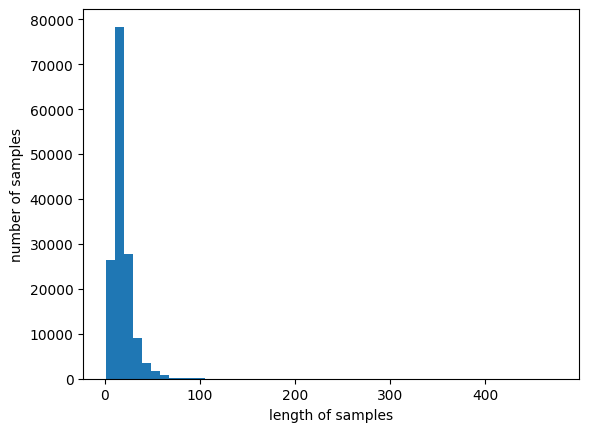

데이터셋 문장 길이가 40 이하 데이터 비율: 96.33%


In [20]:
# 문서 당 시퀀스 길이를 정하는 하이퍼 파라미터
context_length = 40
set_sent_pad(e_x_train, context_length, report=True)

In [21]:
# x_data(원문)의 문장 패딩(정수인코딩의 완료)
padded_x_train = pad_seq_x(e_x_train, context_length)
padded_x_val = pad_seq_x(e_x_val, context_length)
padded_x_test = pad_seq_x(e_x_test, context_length)

# y_label(태그)의 문장 패딩(정수인코딩의 완료)
padded_y_train = pad_seq_x(e_y_train, context_length)
padded_y_val = pad_seq_x(e_y_val, context_length)
padded_y_test = pad_seq_x(e_y_test, context_length)

In [22]:
val_pad_shape(padded_x_train, '훈련')
val_pad_shape(padded_x_val, '검증')
val_pad_shape(padded_x_test, '평가')
print()
val_pad_shape(padded_y_train, '훈련')
val_pad_shape(padded_y_val, '검증')
val_pad_shape(padded_y_test, '평가')

훈련용 정수(원핫)인코딩 shape: (148244, 40)
검증용 정수(원핫)인코딩 shape: (27795, 40)
평가용 정수(원핫)인코딩 shape: (9266, 40)

훈련용 정수(원핫)인코딩 shape: (148244, 40)
검증용 정수(원핫)인코딩 shape: (27795, 40)
평가용 정수(원핫)인코딩 shape: (9266, 40)


In [23]:
import torch
bs = 256 # Batch_size 하이퍼 파라미터

# 정수(원핫)인코딩 데이터를 데이터로더로 변환
trainloader = set_dataloader(padded_x_train, padded_y_train, bs, 
                             content='훈련', report=True)
valloader = set_dataloader(padded_x_val, padded_y_val, bs,
                           content='검증', report=True)
testloader = set_dataloader(padded_x_test, padded_y_test, bs, 
                            content='평가', report=True)

훈련용 X(인코딩)데이터 크기: [148244, 40]
훈련용 Y(Label)데이터 크기: [148244, 40]
검증용 X(인코딩)데이터 크기: [27795, 40]
검증용 Y(Label)데이터 크기: [27795, 40]
평가용 X(인코딩)데이터 크기: [9266, 40]
평가용 Y(Label)데이터 크기: [9266, 40]


In [24]:
# 주요 하이퍼 파라미터 정리
VOCAB_SIZE = len(word_to_idx)
CONTEXT_LEN = context_length
EMB_DIM = 100 # 임베딩 차원은 100으로
NUM_Tags = len(tag_to_idx)
NUM_Layers = 2 #셀의 레이어는 1층이 아니라 2층으로
HIDE_DIM = 500

from tabulate import tabulate

# 출력할 데이터를 리스트 형식으로 준비
data = [
    ["태그 처리된 단어", f"{VOCAB_SIZE}개"],
    ["문장 최대 길이", CONTEXT_LEN],
    ["임베딩 차원", EMB_DIM],
    ["총 태그 종류", f"{NUM_Tags}종"],
    ["언어 모델 층수", f"{NUM_Layers}층"],
    ["히든 레이어 너비", HIDE_DIM]
]

# 표 형식으로 출력
print(tabulate(data, headers=["하이퍼 파라미터", "값"], 
               tablefmt="grid"))

+-------------------+--------+
| 하이퍼 파라미터   | 값     |
+===================+========+
| 태그 처리된 단어  | 4242개 |
+-------------------+--------+
| 문장 최대 길이    | 40     |
+-------------------+--------+
| 임베딩 차원       | 100    |
+-------------------+--------+
| 총 태그 종류      | 38종   |
+-------------------+--------+
| 언어 모델 층수    | 2층    |
+-------------------+--------+
| 히든 레이어 너비  | 500    |
+-------------------+--------+


In [ ]:
import torch.nn as nn
from TorchCRF import CRF

class NERTagger_BiLSTM_CRF(nn.Module):
    def __init__(self, vocab_size, embed_dim, tag_dim,
                 hid_dim, num_layers, emb_matirx=None):
        super(NERTagger_BiLSTM_CRF, self).__init__()

        self.embed = nn.Embedding(vocab_size, embed_dim)
        # 사전훈련 임베딩 사용 유/무 함수
        if emb_matirx is not None:
            self.embed.weight = nn.Parameter(
                torch.tensor(emb_matirx, dtype=torch.float32))
            self.embed.weight.requires_grad = True

        self.lstm = nn.LSTM(input_size=embed_dim, # LSTM에 입력차원
                            hidden_size=hid_dim, # LSTM의 출력차원
                            num_layers=num_layers, # 내부 Cell 몇층?
                            bidirectional=True, #양방향 학습 옵션 On
                            batch_first=True) # 입력텐서 -> batch가 맨처음
        
        # 최종적으로 tag 종류를 맟추는 FC layer
        # 양방향 연산이기에 FC_layer에 입력되는 feature는 2배로 늘어난다
        self.classifier = nn.Sequential(
            nn.Linear(hid_dim*2, tag_dim),
        )

        # CRF 레이어 추가, 입력은 classifier 통과 결과물을 받아야 함
        self.crf = CRF(tag_dim)

    def forward(self, x, tags=None, mask=None):
        # 입력 x : batch_size, seq_length
        emb = self.embed(x) # (batch_size, seq_length, embedding_dim)
        # 양방향 학습 On이기에
        # lstm_out : (bs, seq_len, hidden_dim * 2)
        # hidden = (num_layer * 2, bs, hidden_dim)
        lstm_out, (hidden, cell) = self.lstm(emb)

        # many-to-many 방식이니까 lstm_out을 사용한다.
        logits = self.classifier(lstm_out)
        # logits 출력 : (bs, seq_len, tag_dim)

        # CRF는 훈련모드/평가모드로 나눠서 출력을 달리하자
        # 평가모드 작성이 더 쉬우니 평가, 훈련모드 순으로 작성한다
        if tags is None : # y_label이 없는 '평가 모드'
            # tag가 없으니 마스크도 없다 치고 항상 True마스크를 넣어주자
            # 이러면 출력되는 2중 리스트 길이가 [[seq_len], [seq_len]]으로 고정됨
            one_mask = torch.ones(logits.size(0), logits.size(1), 
                                    dtype=torch.bool,
                                    device=logits.device)
            # CRF의 최적화한 예측값은 2중 리스트 이며
            # [[마스크 적용된 가변 seq], [마스크 적용된 가변 seq]] 형태
            optim_pred = self.crf.viterbi_decode(logits, mask=one_mask)
            # 참고로 mask는 Tensor자료형에 Tag = 1, Pad=0 으로
            # 처리된 데이터임을 명심하자
            return optim_pred

        else: #y_label이 존재하는 '훈련 모드'
            # CRF의 출력은 Loss가 기본출력이고
            # decode 메서드를 써야 CRF로 최적화한 y_pred를 출력한다.
            crf_loss = -self.crf(logits, tags, mask=mask)
            # 통상적인 로스함수처럼 스칼라값이 출력된다.
            optim_pred = self.crf.viterbi_decode(logits, mask=mask)
            # optim_pred 가 이중 리스트 형식이기에 텐서 자료형으로 변환
            # 변환되는 형태는 'logits'과 동일하게 변경되게 하며
            # 이때 (bs, seq_len, tag_dim=1) 이 된다.
            bs, seq_len, _ = logits.size() # 먼저 logit 차원 정보 추출
            # 먼저 tensor 자료형을 logis의 구조와 타입과 동일하게 초기화
            optim_logits = torch.zeros(bs, seq_len, 1, 
                                       dtype=logits.dtype,
                                       device=logits.device)
            # 이중리스트 형식의 optim_pred를 추출해 
            # 텐서 자료형인 optim_logits로 전달
            for i, seq in enumerate(optim_pred):
                optim_logits[i, :len(seq), 0] = torch.tensor(seq,
                                                            dtype=logits.dtype,
                                                            device=logits.device)
            # 최적화된 CRF_y_pred는 텐서 자료형 (bs, seq_len, 1)
            return optim_logits, crf_loss

In [ ]:
import torch.nn as nn
from TorchCRF import CRF

class NERTagger_BiGRU_CRF(nn.Module):
    def __init__(self, vocab_size, embed_dim, tag_dim,
                 hid_dim, num_layers, emb_matirx=None):
        super(NERTagger_BiGRU_CRF, self).__init__()

        self.embed = nn.Embedding(vocab_size, embed_dim)
        # 사전훈련 임베딩 사용 유/무 함수
        if emb_matirx is not None:
            self.embed.weight = nn.Parameter(
                torch.tensor(emb_matirx, dtype=torch.float32))
            self.embed.weight.requires_grad = True

        self.gru = nn.GRU(input_size=embed_dim, # GRU에 입력차원
                            hidden_size=hid_dim, # GRU의 출력차원
                            num_layers=num_layers, # 내부 Cell 몇층?
                            bidirectional=True, #양방향 학습 옵션 On
                            batch_first=True) # 입력텐서 -> batch가 맨처음
        
        # 최종적으로 tag 종류를 맟추는 FC layer
        # 양방향 연산이기에 FC_layer에 입력되는 feature는 2배로 늘어난다
        self.classifier = nn.Sequential(
            nn.Linear(hid_dim*2, tag_dim),
        )

        # CRF 레이어 추가, 입력은 classifier 통과 결과물을 받아야 함
        self.crf = CRF(tag_dim)

    def forward(self, x, tags=None, mask=None):
        # 입력 x : batch_size, seq_length
        emb = self.embed(x) # (batch_size, seq_length, embedding_dim)
        # 양방향 학습 On이기에
        # gru_out : (bs, seq_len, hidden_dim * 2)
        # hidden = (num_layer * 2, bs, hidden_dim)
        gru_out, hidden = self.gru(emb)

        # many-to-many 방식이니까 gru_out을 사용한다.
        logits = self.classifier(gru_out)
        # logits 출력 : (bs, seq_len, tag_dim)

        # CRF는 훈련모드/평가모드로 나눠서 출력을 달리하자
        # 평가모드 작성이 더 쉬우니 평가, 훈련모드 순으로 작성한다
        if tags is None : # y_label이 없는 '평가 모드'
            # tag가 없으니 마스크도 없다 치고 항상 True마스크를 넣어주자
            # 이러면 출력되는 2중 리스트 길이가 [[seq_len], [seq_len]]으로 고정됨
            one_mask = torch.ones(logits.size(0), logits.size(1), 
                                    dtype=torch.bool,
                                    device=logits.device)
            # CRF의 최적화한 예측값은 2중 리스트 이며
            # [[마스크 적용된 가변 seq], [마스크 적용된 가변 seq]] 형태
            optim_pred = self.crf.viterbi_decode(logits, mask=one_mask)
            # 참고로 mask는 Tensor자료형에 Tag = 1, Pad=0 으로
            # 처리된 데이터임을 명심하자
            return optim_pred

        else: #y_label이 존재하는 '훈련 모드'
            # CRF의 출력은 Loss가 기본출력이고
            # decode 메서드를 써야 CRF로 최적화한 y_pred를 출력한다.
            crf_loss = -self.crf(logits, tags, mask=mask)
            # 통상적인 로스함수처럼 스칼라값이 출력된다.
            optim_pred = self.crf.viterbi_decode(logits, mask=mask)
            # optim_pred 가 이중 리스트 형식이기에 텐서 자료형으로 변환
            # 변환되는 형태는 'logits'과 동일하게 변경되게 하며
            # 이때 (bs, seq_len, tag_dim=1) 이 된다.
            bs, seq_len, _ = logits.size() # 먼저 logit 차원 정보 추출
            # 먼저 tensor 자료형을 logis의 구조와 타입과 동일하게 초기화
            optim_logits = torch.zeros(bs, seq_len, 1, 
                                       dtype=logits.dtype,
                                       device=logits.device)
            # 이중리스트 형식의 optim_pred를 추출해 
            # 텐서 자료형인 optim_logits로 전달
            for i, seq in enumerate(optim_pred):
                optim_logits[i, :len(seq), 0] = torch.tensor(seq,
                                                            dtype=logits.dtype,
                                                            device=logits.device)
            # 최적화된 CRF_y_pred는 텐서 자료형 (bs, seq_len, 1)
            return optim_logits, crf_loss

In [27]:
# 학습 실험 조건을 구분하기 위한 키
model_key = ['BiLSTM+CRF', 'BiGRU+CRF']
metrics_key = ['Loss', '정확도']

In [57]:
# 모델 선언
Lstm_tagger = NERTagger_BiLSTM_CRF(VOCAB_SIZE, EMB_DIM, NUM_Tags,
                            HIDE_DIM, NUM_Layers)
Gru_tagger = NERTagger_BiGRU_CRF(VOCAB_SIZE, EMB_DIM, NUM_Tags,
                            HIDE_DIM, NUM_Layers)

In [29]:
# GPU사용 가능 유/무 확인
device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')
models = {} # 딕셔너리

models[model_key[0]] = Lstm_tagger.to(device)
models[model_key[1]] = Gru_tagger.to(device)

In [30]:
import torch.optim as optim
# 로스함수 및 옵티마이저 설계
# 로스함수에서 <PAD> 토큰의 정수인덱스 번호 -> 0번에 대해서는
# 틀리건 맞건 무시하겠다 : ignore_index에 해당 정수 인덱스 번호 기입
ignore_class_idx = 0
# criterion = nn.CrossEntropyLoss(ignore_index=ignore_class_idx)

LR = 0.001 # 러닝레이트는 통일
optimizers = {}

optimizers[model_key[0]] = optim.Adam(Lstm_tagger.parameters(), lr=LR)
optimizers[model_key[1]] = optim.Adam(Gru_tagger.parameters(), lr=LR)

In [31]:
# 학습/검증 정보 저장
history = {key: {metric: [] 
                for metric in metrics_key} 
           for key in model_key}

In [32]:
# 사전에 모듈화 한 학습/검증용 라이브러리 import
from Ner_Trainer import *

num_epoch = 8 #총 훈련/검증 epoch값
ES = 2 # 디스플레이용 에포크 스텝

In [33]:
for key in model_key:
    print(f"\n--현재 훈련중인 조건: [{[key]}]--") # 조건에 맞는 실험시작
    for epoch in range(num_epoch): #에포크별 모델 훈련/검증
        # 모델 훈련
        train_loss, train_acc = model_train(
            models[key], trainloader,
            optimizers[key], epoch, ES, 
            ignore_class=ignore_class_idx, #무시할 클래스 인덱스
            CRF=True #CRF 모드로 동작한다 선언
        ) #모델 검증

        val_loss, val_acc = model_evaluate(
            models[key], valloader,
            epoch, ES, ignore_class=ignore_class_idx, #무시할 클래스 인덱스
            CRF=True #CRF 모드로 동작한다 선언
        )

        # 손실 및 성과 지표를 history에 저장
        history[key]['Loss'].append((train_loss, val_loss))
        history[key]['정확도'].append((train_acc, val_acc))

        # Epoch_step(ES)일 때마다 print수행
        if (epoch+1) % ES == 0 or epoch == 0:
            print(f"epoch {epoch+1:03d}," + "\t" + 
                f"훈련 [Loss: {train_loss:.3f}, " +
                f"Acc: {train_acc*100:.2f}%]")
            print(f"epoch {epoch+1:03d}," + "\t" + 
                f"검증 [Loss: {val_loss:.3f}, " +
                f"Acc: {val_acc*100:.2f}%]")
    print(f"--조건[{[key]}] 훈련 종료--\n") # 조건에 맞는 실험종료


--현재 훈련중인 조건: [['BiLSTM+CRF']]--


100%|██████████| 109/109 [00:25<00:00,  4.20it/s]


epoch 001,	훈련 [Loss: 3.850, Acc: 93.79%]
epoch 001,	검증 [Loss: 2.286, Acc: 95.32%]


100%|██████████| 109/109 [00:25<00:00,  4.26it/s]


epoch 002,	훈련 [Loss: 1.899, Acc: 95.86%]
epoch 002,	검증 [Loss: 1.691, Acc: 96.20%]


100%|██████████| 109/109 [00:24<00:00,  4.38it/s]


epoch 004,	훈련 [Loss: 1.023, Acc: 97.64%]
epoch 004,	검증 [Loss: 1.201, Acc: 97.24%]


100%|██████████| 109/109 [00:24<00:00,  4.45it/s]


epoch 006,	훈련 [Loss: 0.579, Acc: 98.65%]
epoch 006,	검증 [Loss: 1.046, Acc: 97.77%]


100%|██████████| 109/109 [00:23<00:00,  4.64it/s]


epoch 008,	훈련 [Loss: 0.373, Acc: 99.11%]
epoch 008,	검증 [Loss: 1.052, Acc: 97.91%]
--조건[['BiLSTM+CRF']] 훈련 종료--


--현재 훈련중인 조건: [['BiGRU+CRF']]--


100%|██████████| 109/109 [00:24<00:00,  4.54it/s]


epoch 001,	훈련 [Loss: 3.481, Acc: 94.05%]
epoch 001,	검증 [Loss: 2.238, Acc: 95.38%]


100%|██████████| 109/109 [00:23<00:00,  4.60it/s]


epoch 002,	훈련 [Loss: 1.863, Acc: 95.99%]
epoch 002,	검증 [Loss: 1.744, Acc: 96.07%]


100%|██████████| 109/109 [00:25<00:00,  4.22it/s]


epoch 004,	훈련 [Loss: 0.937, Acc: 97.88%]
epoch 004,	검증 [Loss: 1.137, Acc: 97.54%]


100%|██████████| 109/109 [00:24<00:00,  4.52it/s]


epoch 006,	훈련 [Loss: 0.523, Acc: 98.79%]
epoch 006,	검증 [Loss: 1.052, Acc: 97.86%]


100%|██████████| 109/109 [00:24<00:00,  4.48it/s]

epoch 008,	훈련 [Loss: 0.342, Acc: 99.20%]
epoch 008,	검증 [Loss: 1.098, Acc: 97.91%]
--조건[['BiGRU+CRF']] 훈련 종료--



In [34]:
# 학습된 모델 저장
path = {} #모델별 경로명 저장
for mk in model_key:
    path[mk] = f'{mk}_NER.pth'
    torch.save(models[mk].state_dict(), path[mk])

In [58]:
# 저장된 모델 불러오기
load_model = {
    'BiLSTM+CRF': Lstm_tagger,  # LSTM 모델 인스턴스 생성
    'BiGRU+CRF': Gru_tagger      # GRU 모델 인스턴스 생성
}
for mk in model_key:
    load_model[mk].load_state_dict(torch.load(path[mk], weights_only=True))
    #추론기는 CPU에서 돌리자
    load_model[mk] = load_model[mk].to('cpu')

In [102]:
import random
total_docs = len(raw_data)
sample_idx = random.randint(0, total_docs-1)

# 데이터프레임의 항목을 분리 후 리스트 타입으로 변경
sample_doc = raw_data['컨텐츠'].iloc[sample_idx]
# 개체 : 개체 라벨링 의 태그 정보는 따로 추출한다.
sample_tag = raw_data['개체'].iloc[sample_idx]

print(f'임의의 원문: {sample_doc}')
print(f'원문의 태그: {sample_tag}')

임의의 원문: 진해 중앙동 김밥1번지 앞 소화전 불법 주정차 차량 신고합니다 신속한 조치 바랍니다 
원문의 태그: [['진해', 'LOC'], ['중앙동', 'LOC'], ['김밥1번지', 'LOC'], ['앞', 'TRM'], ['차량', 'AFW']]


In [103]:
def convert_model_input(x_data, word_tokenizer, word_to_idx, context_length):
    token_x_data = tokenize([x_data], word_tokenizer)
    e_token = text_to_sequences(token_x_data, word_to_idx)
    pad_token = pad_seq_x(e_token, context_length)
    t_pad_token = torch.tensor(pad_token, dtype=torch.long)

    return t_pad_token # 출력물은 (1, seq_len)의 텐서 자료형

def convert_tag_label(x_data, tags, word_tokenizer, tag_to_idx, context_length):
    temp = tokenize([x_data], word_tokenizer)
    token_label, _ = BIO_tagging(temp, [tags], word_tokenizer)
    e_label = text_to_sequences(token_label, tag_to_idx, spec_token='O')
    pad_label = pad_seq_x(e_label, context_length)
    t_pad_label = torch.tensor(pad_label, dtype=torch.long)

    return t_pad_label # 출력물은 (1, seq_len)의 텐서 자료형

In [104]:
t_doc = convert_model_input(sample_doc, word_tokenizer, word_to_idx, context_length)
print()
t_label = convert_tag_label(sample_doc, sample_tag, word_tokenizer, tag_to_idx, context_length)

토큰화 진행 중: 100%|██████████| 1/1 [00:00<00:00, 1000.07it/s]


BIO 태깅 진행 중: 100%|██████████| 1/1 [00:00<?, ?it/s]


In [105]:
# 모델별 추론 수행행
outputs = {}
for mk in model_key:
    load_model[mk].eval()

    with torch.no_grad():
        # 모델의 출력값 연산
        output = load_model[mk](t_doc)
        # 모델의 출력값은 2중 리스트 형태 -> numpy로 변환
        outputs[mk] = np.array(output[0])

In [106]:
# 출력할 데이터를 저장할 리스트 생성
table_data = []

x_data = t_doc[0].cpu().numpy()
y_label = t_label[0].cpu().numpy()

print(x_data.shape)

for word, tag, lstm_pred, gru_pred in zip(x_data, y_label, 
                                          outputs['BiLSTM+CRF'],
                                          outputs['BiGRU+CRF']):
    if word != 0: #PAD 토큰 제외
        table_data.append([idx_to_word[word], idx_to_tag[tag], 
                           idx_to_tag[lstm_pred], idx_to_tag[gru_pred]])
        
# 테이블 헤더
headers = ["단어", "실제값", "LSTM예측값", "GRU예측값"]

# tabulate를 사용하여 출력
print(tabulate(table_data, headers=headers, tablefmt="rst"))

(40,)
======  ========  ============  ===========
단어    실제값    LSTM예측값    GRU예측값
======  ========  ============  ===========
진해    B-LOC     B-LOC         B-LOC
중앙동  B-LOC     B-LOC         B-LOC
김밥    B-LOC     B-LOC         B-LOC
1       I-LOC     I-LOC         I-LOC
번지    I-LOC     I-LOC         I-LOC
앞      B-TRM     B-TRM         B-TRM
소화전  O         O             O
불법    O         O             O
주정차  O         O             O
차량    B-AFW     B-AFW         B-AFW
신고    O         O             O
<UNK>   O         O             O
<UNK>   O         O             O
한      O         O             O
조치    O         O             O
<UNK>   O         O             O
======  ========  ============  ===========
